<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Principle" data-toc-modified-id="Principle-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Principle</a></span></li><li><span><a href="#Usage" data-toc-modified-id="Usage-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Usage</a></span></li><li><span><a href="#Initialization" data-toc-modified-id="Initialization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Initialization</a></span><ul class="toc-item"><li><span><a href="#Choose-the-file" data-toc-modified-id="Choose-the-file-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Choose the file</a></span></li><li><span><a href="#Import-dataset" data-toc-modified-id="Import-dataset-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Import dataset</a></span></li></ul></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Fourier-Transform" data-toc-modified-id="Fourier-Transform-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Fourier Transform</a></span></li><li><span><a href="#Optimize-phase" data-toc-modified-id="Optimize-phase-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Optimize phase</a></span></li><li><span><a href="#baseline-correction" data-toc-modified-id="baseline-correction-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>baseline correction</a></span></li><li><span><a href="#Verify-your-data" data-toc-modified-id="Verify-your-data-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Verify your data</a></span></li></ul></li><li><span><a href="#PALMA-processing" data-toc-modified-id="PALMA-processing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>PALMA processing</a></span><ul class="toc-item"><li><span><a href="#And-display-result" data-toc-modified-id="And-display-result-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>And display result</a></span></li></ul></li><li><span><a href="#Save-the-data-set" data-toc-modified-id="Save-the-data-set-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Save the data-set</a></span></li></ul></div>


# 2D DOSY NMR Processing and Display


a simplified environment for processing DOSY experiments from Bruker NMR datasets.
The analysis is performed using the PALMA algorithm.

## Principle
The PALMA algorithm performs the Inverse Laplace Transform of each columns of the 2D DOSY experiment.
This inversion is performed by optimizing a target function which maximizes the Entropy of the spectrum, and minimizes its $\ell_1$ norm.

More details are found in the original publication [DOI: 10.1039/c6an01902a](http://doi.org/10.1039/c6an01902a)
or the [WEB server page](http://palma.labo.igbmc.fr/about.html) on which you will also find [advises](http://palma.labo.igbmc.fr/about.html) to obtain the best possible experiments. 

When using this program, please cite the following reference:

A.Cherni, É.Chouzenoux, and M.-A.Delsuc. (2017) "PALMA, an improved algorithm for DOSY signal processing".
*Analyst*, **142**(5), p772-779 


## Usage
Run each python cell in sequence by using the ⇥Run button above (or typing *shift* Enter).

Cells are meant to be used in order, taking you to the complete analysis, but you can go back at any time.

The SPIKE code used for processing is visible in the cells, and can be used as a minimal tutorial.

***Remark*** *to use this program, you should have installed the following packages:*

- *a complete scientific python environment* ( *tested with python 3.6 - [anaconda](https://www.anaconda.com/) 
 but it should also work in python 2.7*)
- [`spike`](https://www.bitbucket.org/delsuc/spike) ( *version 0.99.9 minimum* )
- [`ipywidgets`](https://ipywidgets.readthedocs.io/en/latest/)  ( *tested with version 7.1* )

## Initialization
the following cell should be run only once, at the beginning of the processing

In [1]:
# load all python and interactive tools
from __future__ import print_function, division
from importlib import reload
from IPython.display import display, HTML, Markdown, Image, Javascript
display(Markdown('## STARTING Environment...'))
%matplotlib notebook
import os.path as op
import spike
from spike.File.BrukerNMR import Import_2D
from spike.plugins.PALMA import Import_DOSY
from spike.Interactive import INTER as I
from spike.Interactive.ipyfilechooser import FileChooser
display(Markdown('## ...program is Ready'))
I.hidecode()

## STARTING Environment...


          SPIKE
    Version     : 0.99.10
    Date        : 14-08-2019
    Revision Id : 421
*** zoom3D not loaded because of an error ***
plugins loaded:
Bruker_NMR_FT,  Bucketing,  FTMS_calib,  Fitter,  Integrate,  Linear_prediction,  PALMA,  Peaks,  apmin,  bcorr,  bokeh_display,  fastclean,  gaussenh,  pg_sane,  rem_ridge,  sane,  sg,  test,  urQRd,  wavelet, 

spike.plugins.report() for a short description of each plugins
spike.plugins.report('module_name') for complete documentation on one plugin


## ...program is Ready

### Choose the file
The `FileChooser()` tool creates a dialog box which allows to choose a file on your disk

- use the `Select` button
- modify the ( *optional* ) `path` argument, to start the exploration on a given location
- choose the `ser  file of your DOSY experiment
    - *note, the* `difflist` *file should be present*
- After the selection, the selected filename is found in `FC.selected`

In [2]:
FC = FileChooser(path='/NO-BCK/pharma/',filename='ser')
display(FC)

FileChooser(path='/NO-BCK/pharma', filename='ser', show_hidden='False')

### Import dataset

This is simply done with the `Import_2D()` tool, which returns a `SPIKE` object.

We store the dataset into a variable, typing the variable name shows a summary of the dataset. 

Reading file  /NO-BCK/pharma/Chloro/Chloro2_161006/31/ser
DOSY performed on 1H
bpp_ste_2echoes
0.0021999999999999997 0.137075 0.00025 bpp_ste_2echoes 1H



<IPython.core.display.Javascript object>


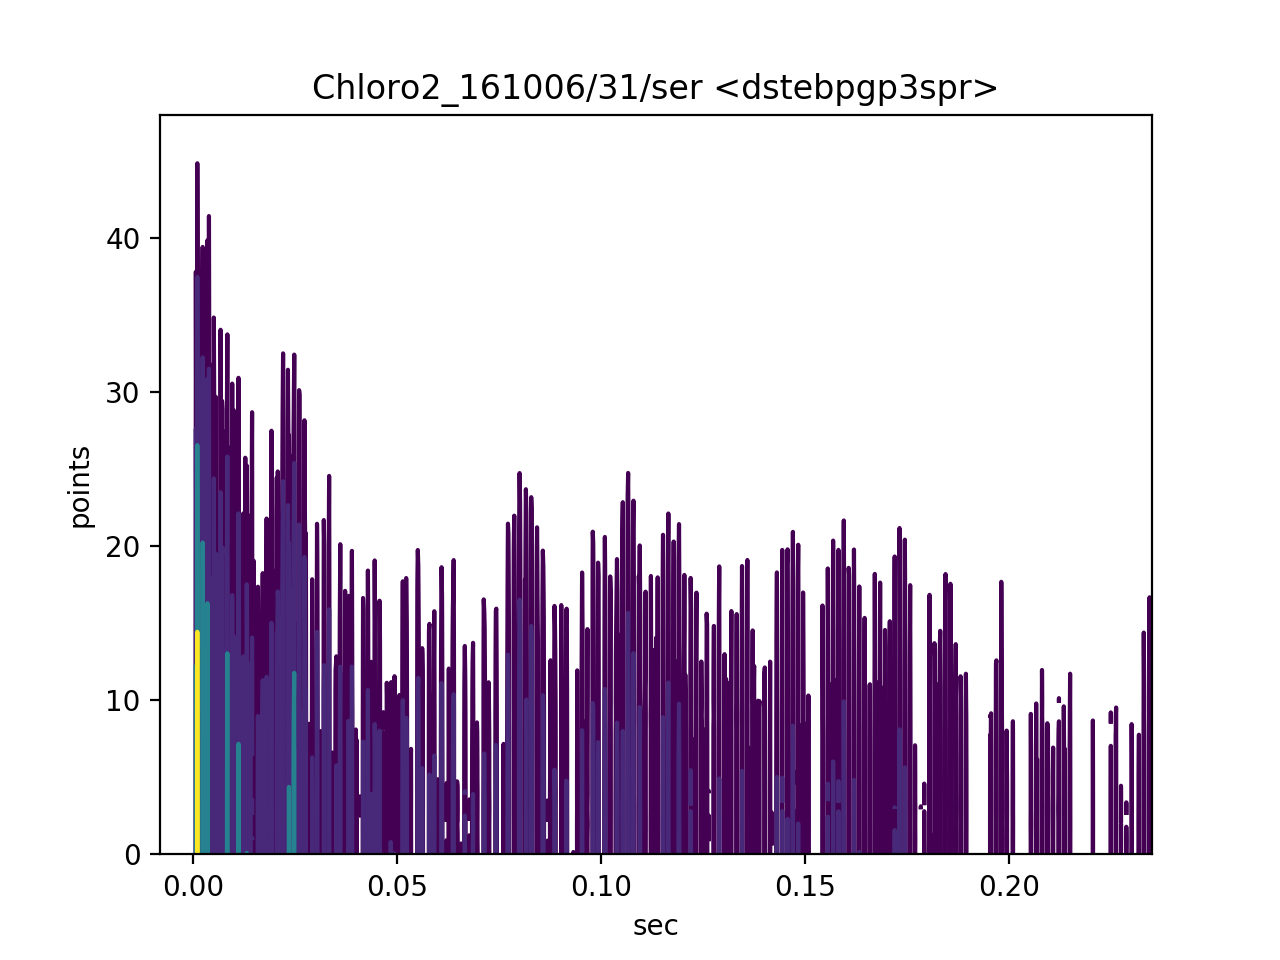

computed scale: 1.01


2D data-set
Axis F1 :Laplace axis of 50 points,  from 1.000000 to 10.000000  using a scaling factor of 205679.740327
Axis F2: NMR axis at 700.163380 MHz,  2048 complex pairs,  from -1.189706 ppm (-832.988604 Hz) to 10.832500 ppm  (7584.519814 Hz)
data-set is complex in F2

In [3]:
if not op.exists(op.join(FC.selected_path,'difflist')):
    I.jsalert('No difflist file present - is this a DOSY experiment ?')
print('Reading file ',FC.selected)
d2 = Import_DOSY(FC.selected)
d2.filename = FC.selected
d2.pulprog = d2.params['acqu']['$PULPROG']
print (d2.params['acqu']['title'])
d2.axis2.currentunit = 'sec'
d2.axis1.currentunit = 'points'
d2.display(title="%s/ser %s"%(FC.nmrname,d2.pulprog), scale='auto')

In the current set-up, the figure can be explored *(zoom, shift, resize, etc)* with the jupyter tools displayed  below the dataset.
The figure can also be saved as a `png` graphic file.

At anytime, the figure can be frozen by clicking on the blue button on the upper right corner, just rerun the cell to make it interactive again.

## Data Preparation
We are going to use a basic processing set-up, check the documentation for advanced processing

### Fourier Transform

<IPython.core.display.Javascript object>


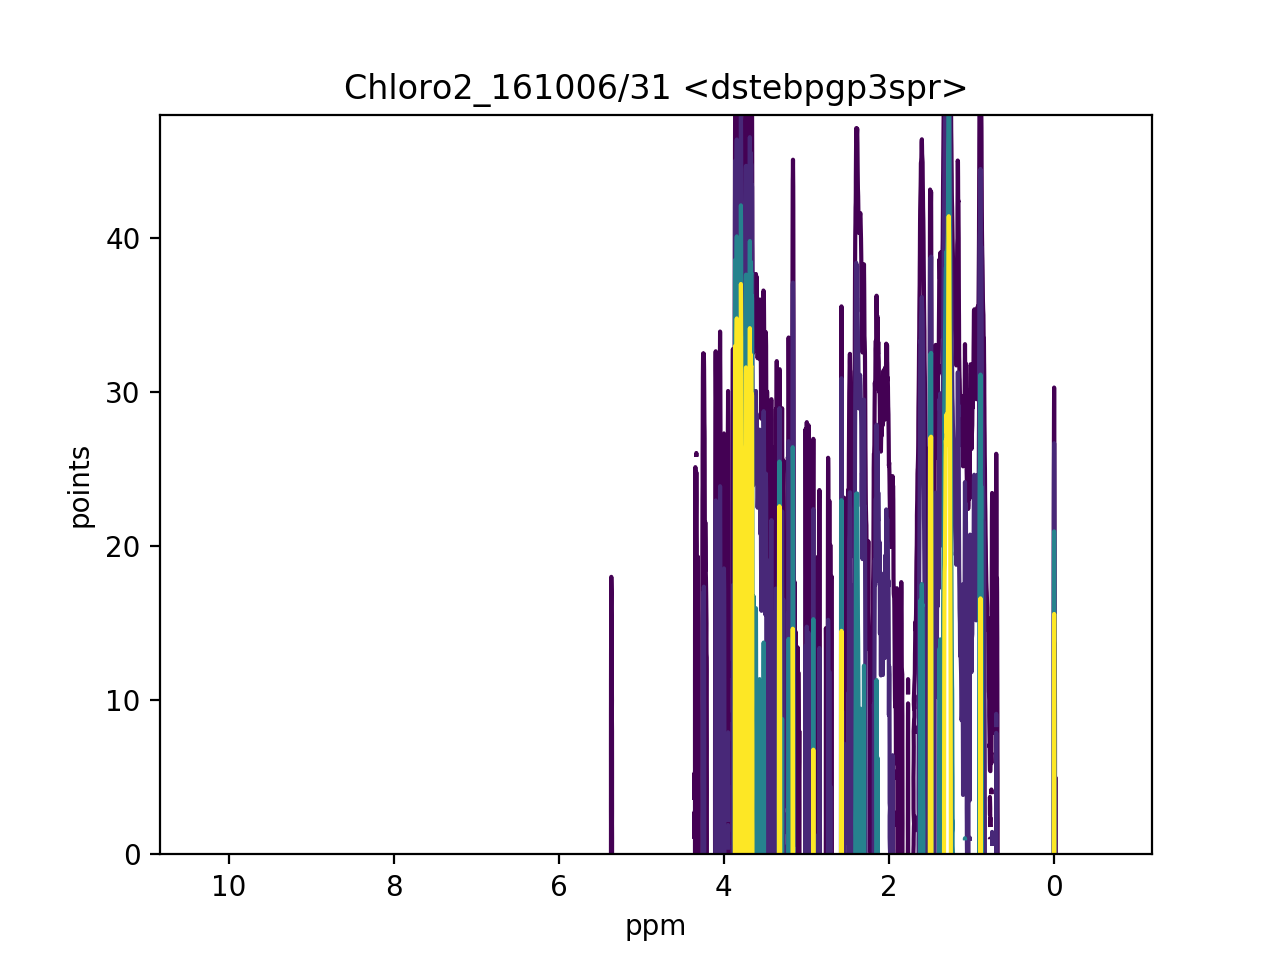

computed scale: 7.28


2D data-set
Axis F1 :Laplace axis of 50 points,  from 1.000000 to 10.000000  using a scaling factor of 205679.740327
Axis F2: NMR axis at 700.163380 MHz,  4096 complex pairs,  from -1.189706 ppm (-832.988604 Hz) to 10.832500 ppm  (7584.519814 Hz)
data-set is complex in F2

In [10]:
D2 = d2.copy() # copy the imported data-set to another object for processing
# bk_ftF2 and bk_ftF1 (define in the Bruker plugin) find which FT to apply depending on FnMODE
D2.apod_sin(maxi=0.1,axis='F2').zf(1,2).bk_ftF2().bk_pk()  # chaining  apodisation - zerofill - FT
D2.axis2.currentunit = 'ppm'
D2.display(scale="auto", autoscalethresh=6.0, title="%s %s"%(FC.nmrname,d2.pulprog))  # chain  set to ppm unit - and display

### Optimize phase
If required, rephase first rows, and the correction will be applied to the whole dataset.

<IPython.core.display.Javascript object>


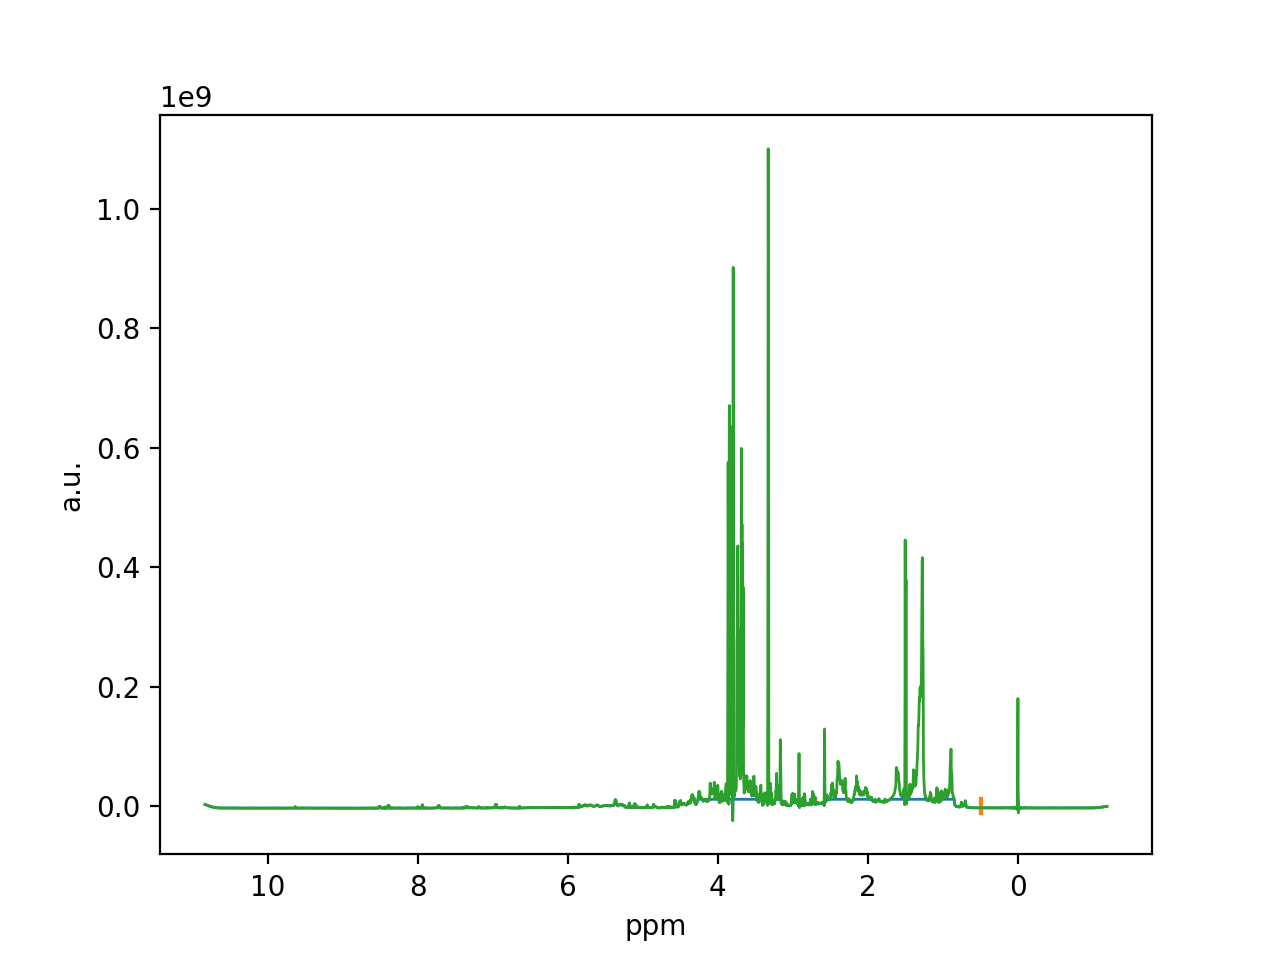

Applied: phase(2.5,  30.0)


<IPython.core.display.Javascript object>


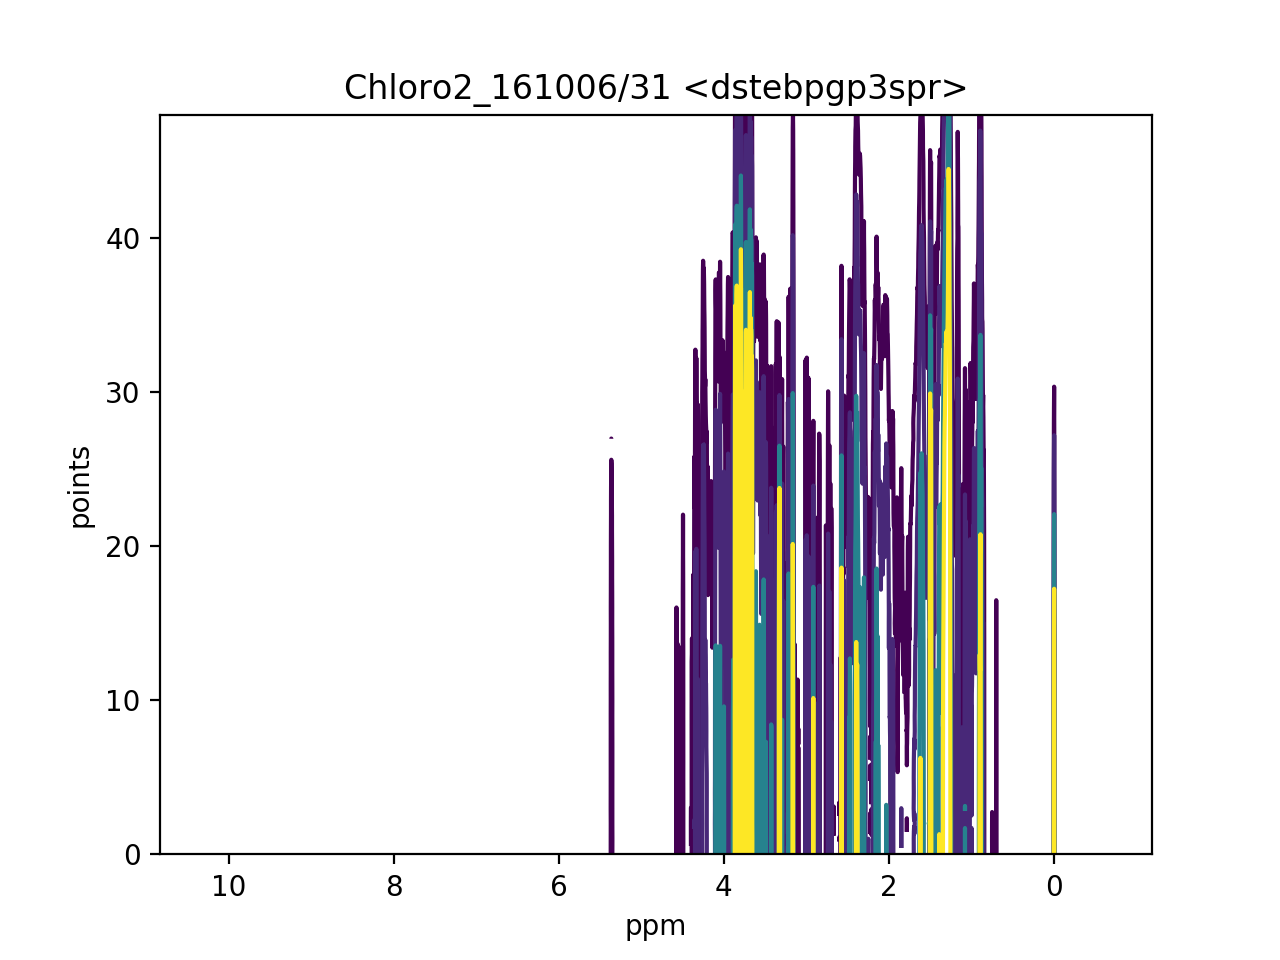

computed scale: 9.78


In [11]:
R1 = D2.row(0) # copy the first line to another object for processing
for i in range(4):
    R1 += D2.row(i+1)
Ph = I.Phaser1D(R1)  # phase it
def loc(b):    # patch the on_done action o the phaser to propagate to DOSY
#    Ph.on_Apply(b)
    lp0, lp1 = Ph.ppivot() # get centered values
    if lp0 != 0 or lp1 != 0:
        D2.phase(lp0, lp1, axis=2)
        D2.display(scale="auto", autoscalethresh=6.0, title="%s %s"%(FC.nmrname,d2.pulprog))
Ph.button.on_click(loc)
display(Ph)

### baseline correction
A flat baseline centered on 0 is a requisite for a correct analysis.
The following tool allows to point baseline positions on a extracted 1D, see the effect of the correction, and apply it to the whole 2D experiment.

- use `add` and `rem` buttons to place points at the location of the selector.
- the `auto` button populates with a first set of 8 positions

<IPython.core.display.Javascript object>


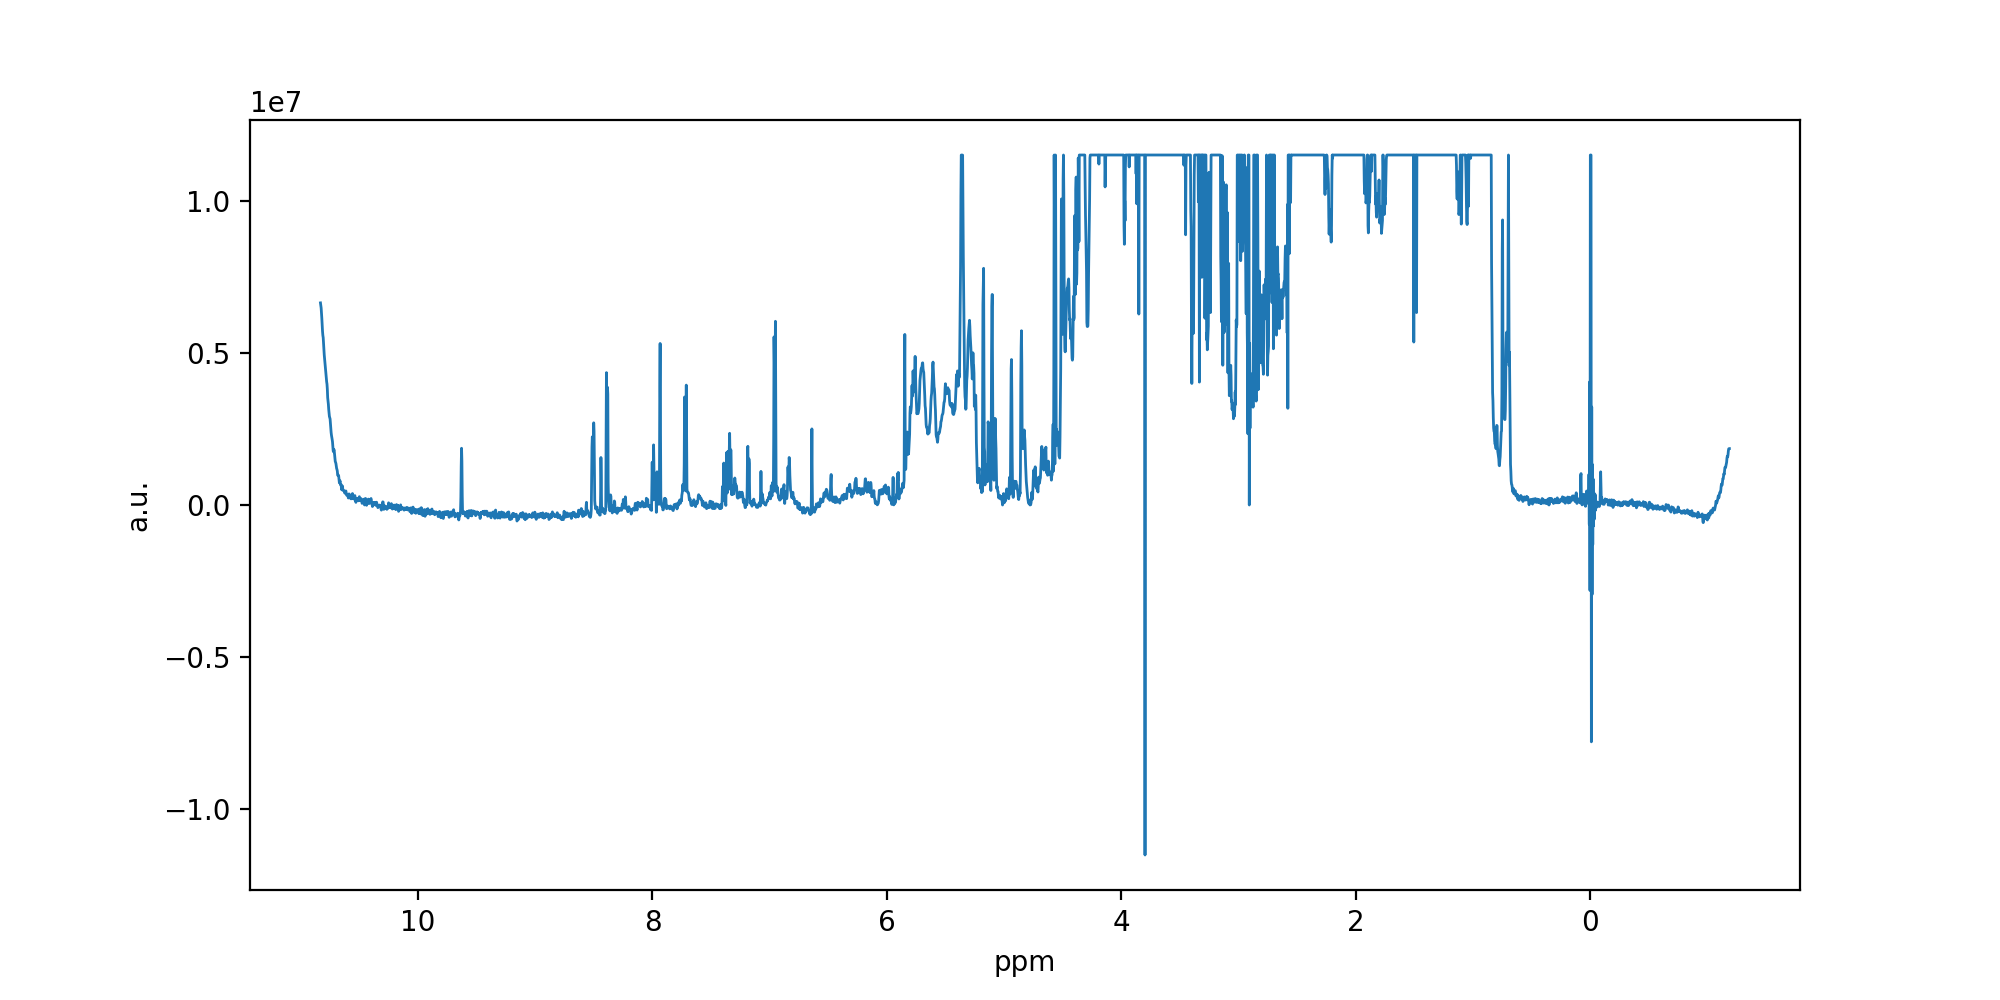

Applied correction:
 [10.242399044086328, 7.923096779550012, 7.5414394448794795, 5.013693559100024, 4.77882750699508, 2.908706567109468, 0.351602424816895, -0.6515104837233181]


In [12]:
R1 = D2.row(0) # copy the imported data-set to another object for processing
for i in range(4):
    R1 += D2.row(i+1)
D2.projF2 = R1
b = I.baseline2D_F2(D2)

### Verify your data

<IPython.core.display.Javascript object>


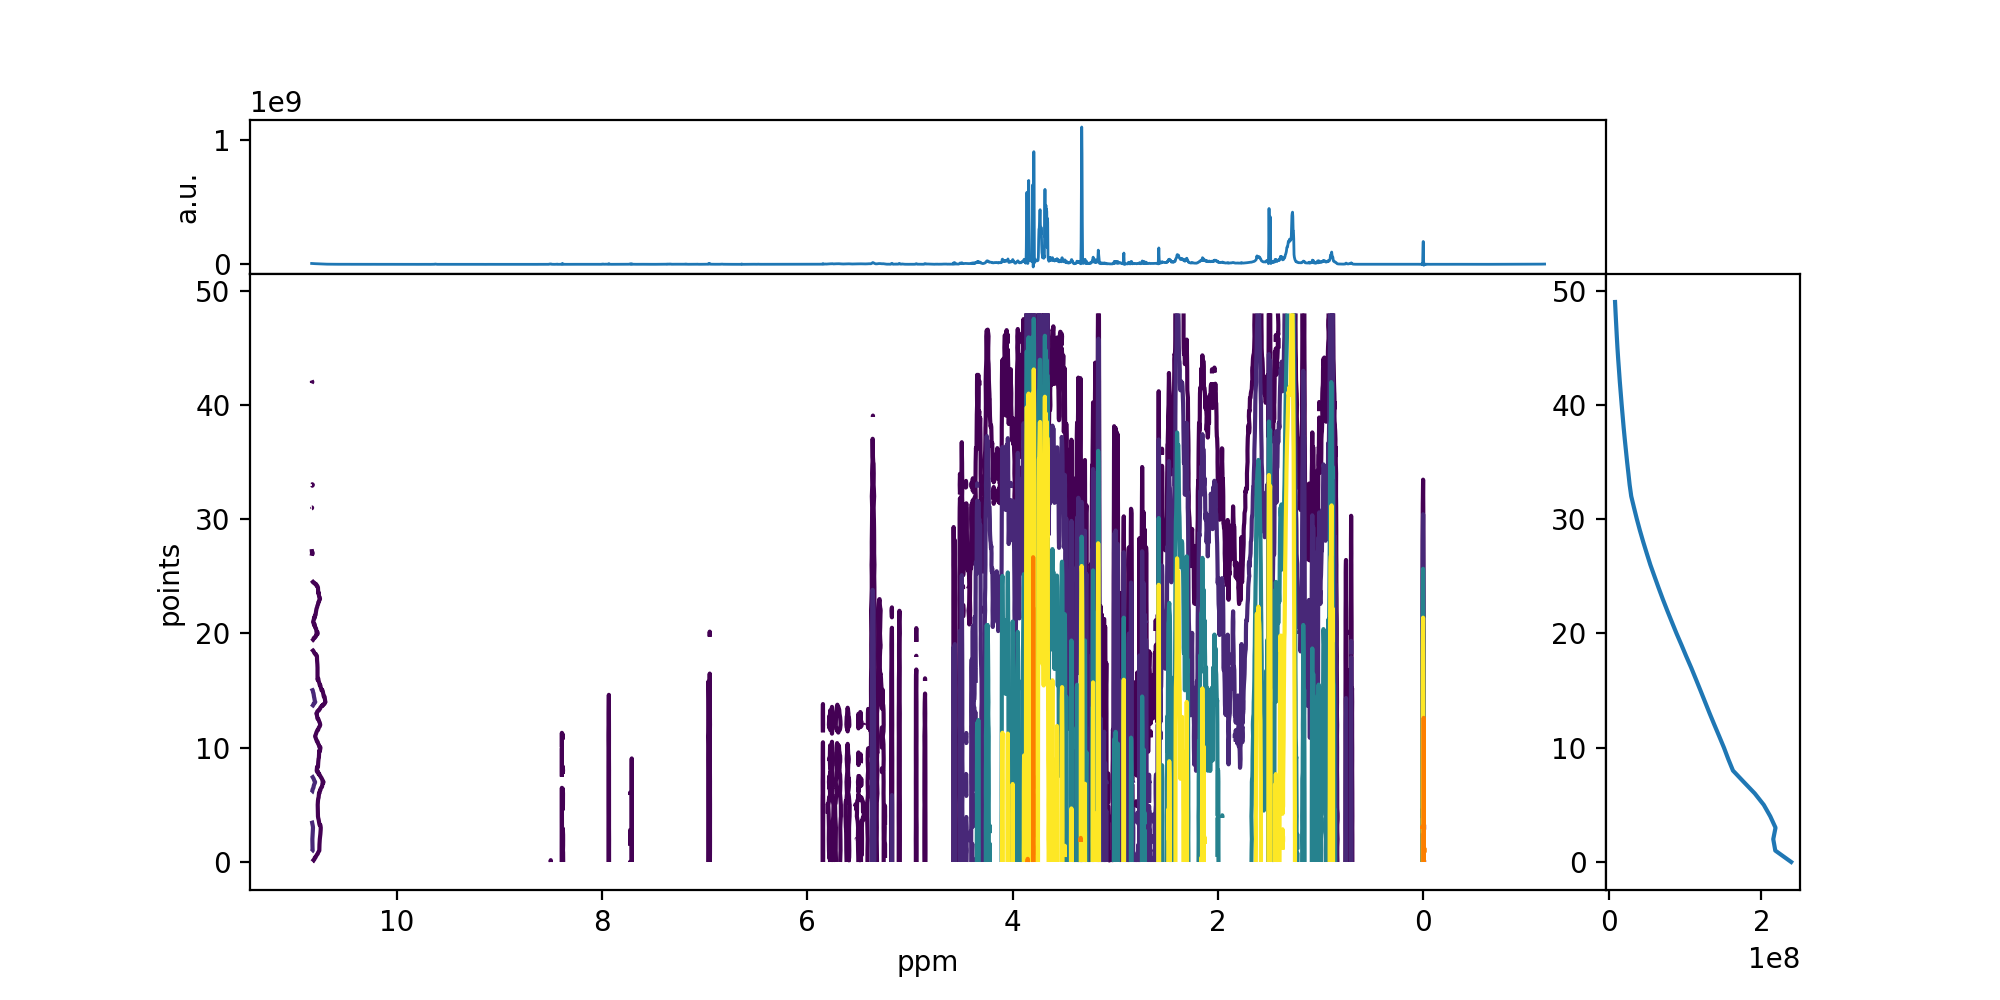

In [13]:
I.Show2D(D2)

## PALMA processing
First set you parameters

Processing time is proportional to $N$ `x nbiter x finalsize`

where $N$ is the number of processed columns (chosen with `miniSNR`)

In [14]:
# Diffusion axis
finalsize = 256  # The final of the DOSY on the diffusion axis
Dmin = 10       # the minimum diffusion coefficient (in µm2/sec) typical is 1-100
Dmax = 10000     # the maximum diffusion coefficient (in µm2/sec) typical is 5000-50000

# Processing
nbiter=1000      # number of iterations - the more the better (usually)
lamda=0.1        # weight between "pure" MaxEnt (1.0) and "pure" l1 (0.0)

# Optionnal parameters
miniSNR=16       # minimum SNR in column to do processing - 32 is optimal -
# uncertainty=1.2  # if >1 allows more room for algo when data quality is poor
# precision=1e-08  # stopping criterium

# MultiProcessing
mppool=None         # a multiprocessing pool to do a parallel processing (faster)
# if you want to use the mp capability, uncomment the following 3 lines
#import multiprocessing as mp
#NProc = 2           # here for 2 cores - adapt to your own set-up
#mppool = mp.Pool(processes=NProc)

In [15]:
D2.prepare_palma(finalsize, Dmin, Dmax)      # set-up diffusion axis
DD2 = D2.do_palma(nbiter=nbiter, lamda=lamda, mppool=mppool)  # launch computation
if mppool: mppool.close()  # clean-up

/Users/mad/spike/spike/plugins/PALMA.py:85: RuntimeWarning: invalid value encountered in log
  s = x*(1 - np.log(x)/(1+x)) + A/(1+x-limit)**0.75
/Users/mad/spike/spike/plugins/PALMA.py:85: RuntimeWarning: invalid value encountered in power
  s = x*(1 - np.log(x)/(1+x)) + A/(1+x-limit)**0.75
PALMA: 100% [----------------------------------------------------]Time: 0:04:34


### And display result
Diffusion coefficients are along the vertical axis. Values are in $\mu m^2 / sec$ which is $10^{-12} m^2 / sec$.
Typical diffusion of small molecules in a solvent are between 100 and 1000 $\mu m^2 / sec$ ($10^{-10} - 10^{-9} m^2 / sec$). Expect water around $3000 \, \mu m^2 / sec$ ($3 \, 10^{-10} m^2 / sec$)


<IPython.core.display.Javascript object>


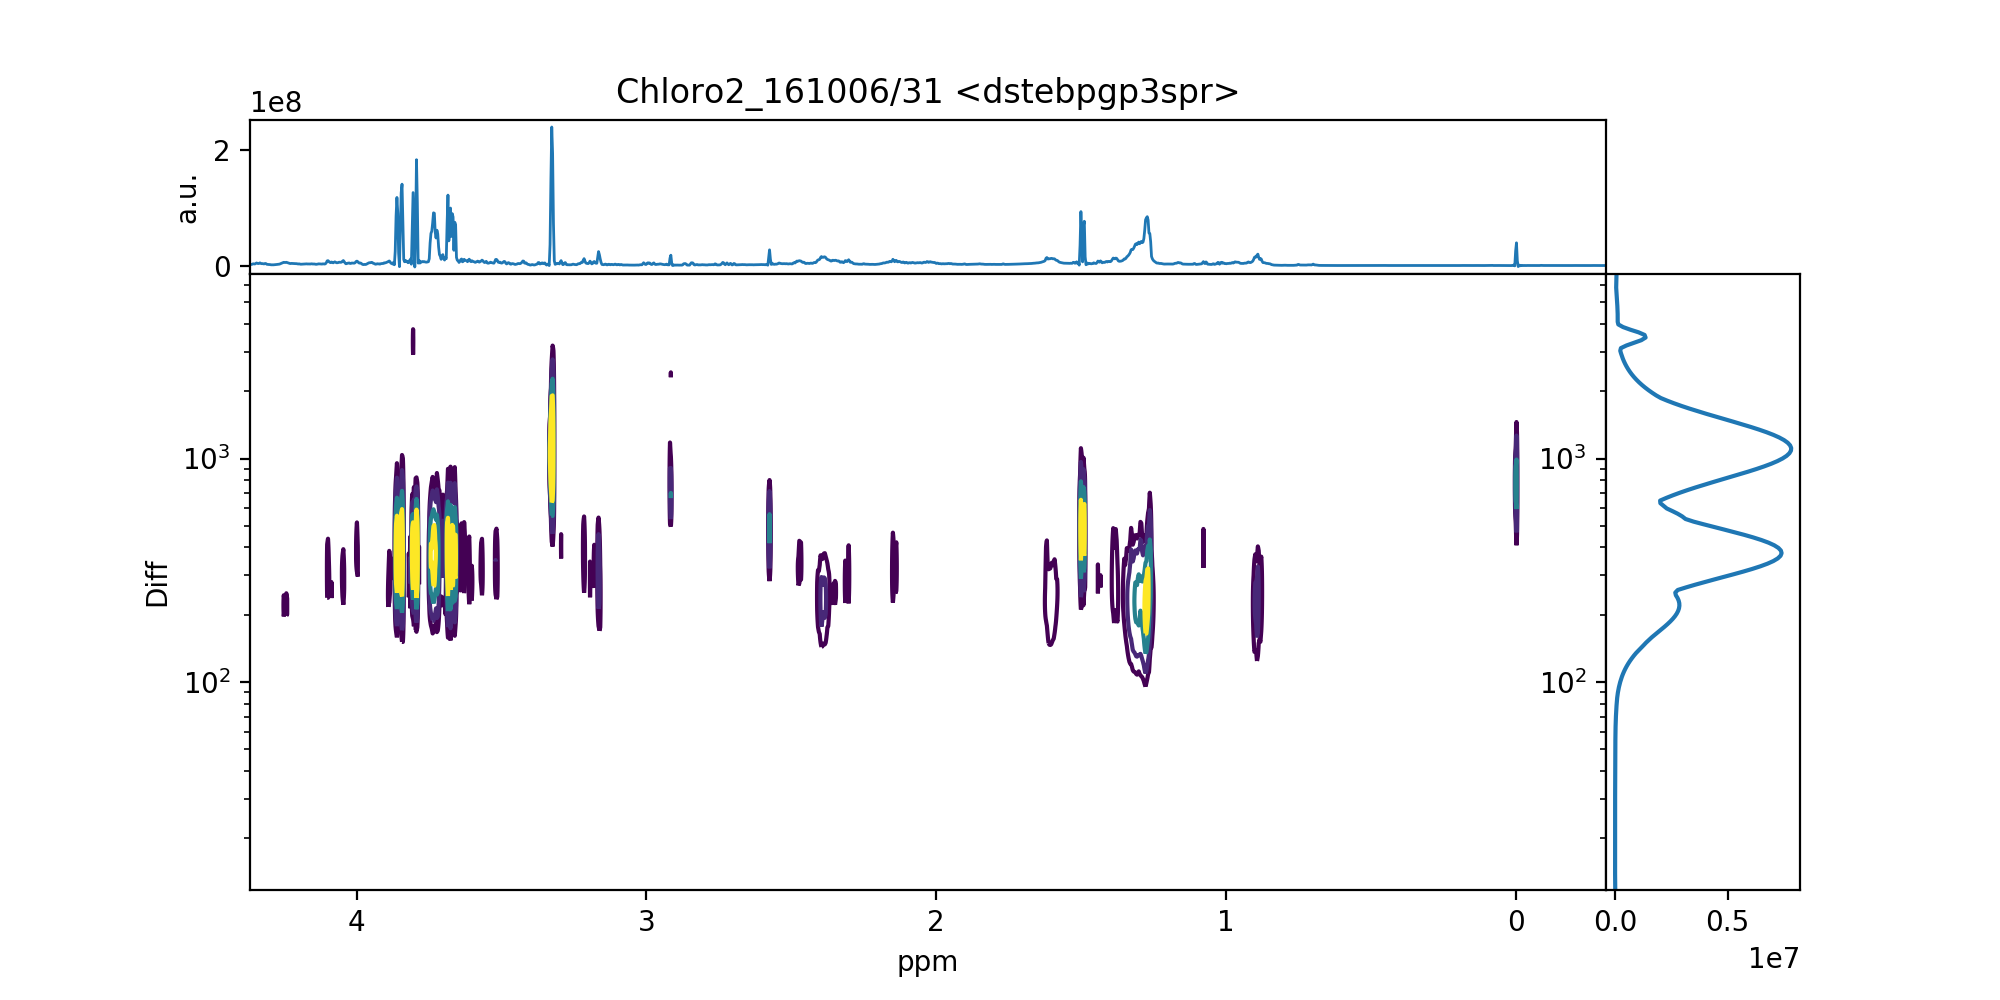

/Users/mad/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


/Users/mad/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


In [16]:
DD2.axis1.currentunit = 'Diff'
DD2.projF2 = D2.row(0)
DD2.projF1 = DD2.proj(axis=1,)
I.Show2D(DD2, title="%s %s"%(FC.nmrname,d2.pulprog))

## Save the data-set
either as stand alone native SPIKE files, (there are other formats)

In [ ]:
DD2.save('dosy.gs2')

*Tools in this page is under intensive development - things are going to change rapidly.*